# Fundamentals of Deep Learning -  Playground

🧠 Welcome to this module of Deep Learning!

🎯 In this challenge, our goal is two-fold:
1. Get a visual representation of Neural Networks
2. Build a better intuition of what Neural Networks are doing

👉 We will use ***[Tensorflow Playground](https://playground.tensorflow.org/)***

_(This first challenge does not require much coding_)

## Classification in Deep Learning

### (1) The data

❓ Let's go to the [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2&seed=0.23545&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&showTestData_hide=false&stepButton_hide=false&activation_hide=false&problem_hide=false&batchSize_hide=true&dataset_hide=false&resetButton_hide=false&discretize_hide=false&playButton_hide=false&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=false&numHiddenLayers_hide=false) and select the following type of data ❓ 

- A classification problem 
- The circle dataset (<span style="color:blue">blue dots</span> inside a circle of <span style="color:orange">orange dots</span>)
- Ratio of training to test data : $ 70 \% $
- No noise ($ = 0$)
- Do not show test data (right panel) 
- Do not discretize the output
- Activation function: ***ReLU*** 

<details>
    <summary><i> Why Relu? </i></summary>
        
💡 In general, try it by default. It appears to work better for many problems!
    
_Note: Playground only allows you to select **one** activation function that is used for **all** of the **hidden** layers_

</details>

### (2) The features

❓ <u>Questions about the features</u> ❓

1. Select only the features $X_1$ and $X_2$ (_unselect the other features if necessary_)
2. If you were using the other variables such as $X_1^{2}$, $X_2^{2}$, $X_1 X_2$, $sin(X_1)$ and $sin(X_2)$, what type of classic Machine Learning operation does it correspond to?

> YOUR ANSWER HERE

<details>
    <summary><i>Answer</i></summary>

* It corresponds to some type of ***feature engineering*** where you transform them. 
    * <i>Examples: multiplication, sinus, square, ...</i>
* Here, in this exercise but also tomorrow, we will only use the raw input features $X_1$ and $X_2$. 
</details>



### (3) Building and Fitting a Neural Network in ***Playground***

❓ <u>Questions about Neural Networks</u> ❓ 

* 🧠 Build a model with the following architecture:
    - three hidden layers
    - 5 neurons on the first hidden layer
    - 4 neurons on the second hidden layer
    - 3 neurons on the last hidden layer
    - In ***Playground***, the output layer is not represented: 
        - For a binary classification task, the Playground will automatically use a dense layer with 1 neuron activated by the tanh (hyperbolic tangent) function $ \large \phi(z) = \frac{sinh(z)}{cosh(z)} = \frac{e^z - e^{-z}}{e^z + e^{-z}} $.
        - This tanh function outputs values between -1 and 1 and visualises nicely in the Playground.
        - However, in practice, for a binary classficiation, we will go back to using the sigmoid function with outputs between 0 and 1. Remember the Logistic Regression!
        - For math lovers: sigmoid and tanh have the same shape: they are just shifted and stretched versions of each others.

* 💪 ***Fit it and stop the iterations when the loss function has stabilized.***

* 👀 Observe carefully:
    - Look at the individual neurons and try to understand what each neuron has specialized for during the _.fit()_
    - What do you think about the overall shape your results? Re-run the neural network with different activation functions to compare. Can you make it work with "Linear"?

<details>
    <summary>Answer: some insights about the activation functions</summary>

- Results may look like a hexagon because ReLu is piece-wise linear!
- A non-linearly separable problem cannot be fitted with a linear activation such as **Linear**
- Surprisingly, a piece-wise linear activation function such as **ReLu** (or **LeakyReLu**) fits this non-linearly separable problem well (even if that is not always true)
- The `tanh` activation gives a "smoother" decision boundary
- The **sigmoid** does **not** seem to work well here (i.e. it takes __many__ epochs before it can classify effectively)
    
🧑🏻‍🏫 Always start with ReLu, it's a safe bet 🧑🏻‍🏫!
</details>



### (4) Building and Fitting a Neural Network in ***Tensorflow.Keras***

👇 We wrote the same model for you - at least the architecture - in Tensorflow's Keras

In [1]:
from keras import Sequential, Input, layers

model = Sequential()

model.add(Input(shape=(2,))) # Input layer with 2 features

model.add(layers.Dense(5, activation='relu')) # 1st hidden layer with 5 neurons
model.add(layers.Dense(4, activation='relu')) # 2nd hidden layer with 4 neurons
model.add(layers.Dense(3, activation='relu')) # 3rd hidden layer with 3 neurons

model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"

<details>
    <summary><i>What to understand about the code of a Neural Network? </i>👆</summary>

- <u>First Hidden Layer a.k.a ***Input Layer***</u>:
    - Every datapoint that will be input to the neural network has two features $ X = \begin{bmatrix} 
           X_{1} \\
           X_{2} \\
         \end{bmatrix} $.
    - You need to inform your Neural Network about the ***number of input features*** through the ***`input_dim` argument***
    - A Neural Network tries to mimic the human brain. Here we would like to use 5 neurons to start analyzing each of these points.
    
    - Every datapoint goes through the first hidden layer which was built using 5 neurons $ layer_1 = \begin{bmatrix} 
           a_{1} \\
           a_{2} \\
           a_{3} \\
           a_{4} \\
           a_{5} \\           
         \end{bmatrix} $
    
 - <u>Second Hidden Layer</u>:
         
    - What if we want to ***make the information flow*** through a second hidden layer with 4 neurons? It is totally possible!
    - These 4 neurons $ layer_2 = \begin{bmatrix} 
           b_{1} \\
           b_{2} \\
           b_{3} \\
           b_{4} \\ 
         \end{bmatrix} $ from the second layer will analyze the output from the 5 neurons in the first layer
    
- <u>Third Hidden Layer</u>:
        - What if we want the information to **continue to flow** through a third hidden layer with 3 neurons? Again, totally possible!

    - Every neuron's output from the second layer goes through the third hidden layer which was built using 3 neurons $ layer_3 = \begin{bmatrix} 
           c_{1} \\
           c_{2} \\
           c_{3} 
         \end{bmatrix} $
         
    - These 3 neurons analyze the outputs of the neurons in $ layer_2  $ !

- <u>Predictive Layer</u>
    - You are dealing with a binary classification task
    - We could use two neurons to predict the probability of belonging to class A or class B...
    - But one neuron predicting the probability of "success" is enough

- <u>About activation functions</u>
    - Despite its simplicity, the ***ReLU*** has proven to be very effective to add some non-linearity to the layers
    - For the predictive layer, the best activation function to use for a classification task is the ***sigmoid*** function. That is something we've already discussed during Decision Science and Machine Learning.

- <u>About the Sequential aspect of the Network</u>:
    - The fact that you are defining a **Sequential** model has a consequence: each layer is aware of its input size based on the output size of the previous layer!
    
</details>

❓ How many parameters are involved in this small Neural Network ❓

In [3]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58 (232.00 B)

 Trainable params: 58 (232.00 B)

 Non-trainable params: 0 (0.00 B)

<details>
    <summary><i>Hint</i></summary>

✅ You should have 58 parameters
    
❌ If not, double-check your architecture    
</details>

### (5) The XOR Dataset

❓ <u>Playing with the XOR Dataset</u> ❓ 

* On Playground:
    - Change the dataset to the "XOR - Exclusive Or".
    - Try to design a model with two hidden layers that has a very small **test loss** 
        - Note: you are free to choose the number of neurons per layer yourself.  
        
* Coding with Tensorflow/Keras:
    - Once you have built your model on Playground, code it down below with the Tensorflow/Keras library

In [7]:
from tensorflow.keras import Sequential, layers, Input
import numpy as np
# Jeu de données XOR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

In [8]:
# Neural Network that can be well fitted to the XOR Dataset

from keras import Sequential, Input, layers

model = Sequential()

model.add(Input(shape=(2,))) # Input layer with 2 features

model.add(layers.Dense(4, activation='relu')) # 1st hidden layer with 5 neurons
model.add(layers.Dense(4, activation='relu')) # 2nd hidden layer with 4 neurons

model.add(layers.Dense(1, activation='sigmoid')) # Output layer that outputs a probability of belonging
                                                 # to the class of "success"

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=500, verbose=0)


In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 37 (148.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 76 (308.00 B)

In [10]:
# Évaluation
pred = model.predict(X)
print(np.round(pred, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.354]
 [0.741]
 [0.651]
 [0.28 ]]


### (6) The Spiral Dataset

❓ <u>Playing with the Spiral Dataset</u> ❓ 

* On Playground:
    - Change the dataset to the "Spiral".
    - Try to design a model with three hidden layers that has a very small **test loss** 
        - Note: you are free to choose the number of neurons per layer yourself.  
        
* Coding with Tensorflow/Keras:
    - Once you have built your model on Playground, code it down  below with the Tensorflow/Keras library

In [13]:
# Neural Network that can be well fitted to the Spiral Dataset
from tensorflow.keras import Sequential, layers, Input
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Remplacer make_moons par Spiral si tu as les données Spiral
# sinon, on génère un dataset similaire à forme complexe
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(2,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(12, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc:.3f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017     
Accuracy: 1.000


In [14]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097 (4.29 KB)

 Trainable params: 365 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 732 (2.86 KB)

In [15]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Train acc={train_acc:.3f}, Test acc={test_acc:.3f}")


Train acc=0.999, Test acc=1.000


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step 


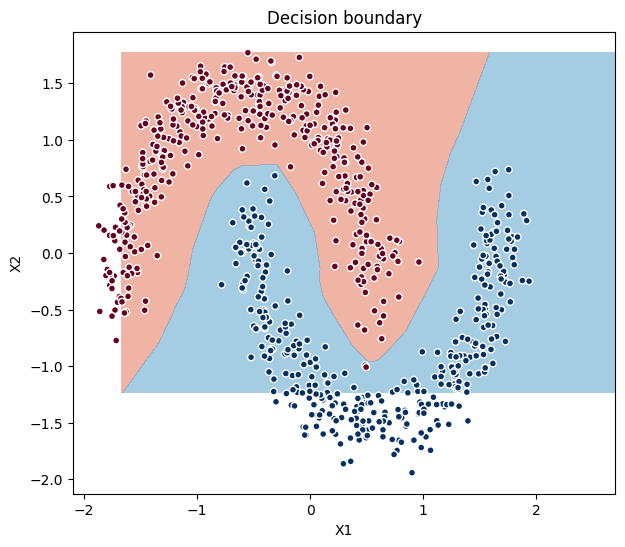

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Grille de points sur l’espace (X1, X2)
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)

# Prédictions sur la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu", edgecolor="white", s=25)
plt.title("Decision boundary")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


### (7) How Deep should a Neural Network be ? 

👀 If you compare the number of parameters needed to fit the Spiral Dataset vs. the XOR dataset, the former requires many more weights....

😃 Actually, if your models are deep enough, you could potentially fit pretty much any pattern...

---

<details>
    <summary><i>Should I create Very Deep Neural Networks? </i></summary>
        
<u>Examples:</u>
    
* Think about a human being. The more this person spends time coding in Python, the better he/she will get better at it!
    
* Think about a student. The more this person studies, the better he/she will pass exams. But sometimes students can study "too much" about a topic and forget about the global picture of a course....
    
<u>Lessons</u>
    
🧠 For Deep Learning Models, the more layers they have, the more opportunities they will have to learn the patterns in the data...

❗️ The problem is about avoiding **overfitting** ❗️
    
☠️ Add a good deal of noise and you _may_ see that your model will have learned "too much" about this noise. 
  
    
📆 The next lecture **Deep Learning > Optimizers, Loss, & Fitting** is dedicated to helping you understand which techniques we can use to prevent Deep Learning models from overfitting.

</details>

---

<details>
    <summary><i>A picture of overfitting in Playground</i></summary>
    
<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/playground-overfitting.png' width=700 style='margin:auto'>
</details>

---

## Regression in Deep Learning

<u>Let's try to complete a Regression Task using Deep Learning</u>


This time, the last layer will no longer look like:  
```python
model.add(layers.Dense(1, activation='sigmoid'))
```

but instead  :
```python
model.add(layers.Dense(1, activation='linear'))
```

This means that the output of this network is no longer between $0$ and $1$ (probability) but between $ -\infty$ and $+ \infty$.

❓ <u>Playing with the Regression Dataset</u> ❓ 

* On Playground:
    - Change the dataset to the "Regression".
    - Try to design a model that has a very small **test loss** 
        - Note: you are free to choose both the number of layers and the number of neurons per layer yourself 
        
* Coding with Tensorflow/Keras:
    - Once you have built your model on Playground, code it down  below with the Tensorflow/Keras library

In [17]:
# Neural Network that can be well fitted to the Regression Dataset

from tensorflow.keras import Sequential, layers, Input
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Génération d’un dataset de régression synthétique
X, y = make_regression(n_samples=1000, n_features=2, noise=10, random_state=0)

# 2️⃣ Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Définition du modèle (reprend ta structure du Playground)
model = Sequential([
    Input(shape=(2,)),                   # 2 features : X1, X2
    layers.Dense(8, activation='relu'),   # 1re couche cachée
    layers.Dense(2, activation='relu'),   # 2e couche cachée
    layers.Dense(1, activation='linear')  # sortie linéaire car régression
])

# 5️⃣ Compilation
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6️⃣ Entraînement
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)

# 7️⃣ Évaluation
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}, Test MSE: {loss:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1856.8962 - mae: 29.3212 
Test MAE: 29.32, Test MSE: 1856.90


In [18]:
from tensorflow.keras import Sequential, layers, Input

model = Sequential([
    Input(shape=(2,)),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, verbose=0)
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}, Test MSE: {loss:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3080.8391 - mae: 45.6712 
Test MAE: 45.67, Test MSE: 3080.84


🏁 You are now ready to do the same things with Tensorflow's Keras directly!

💪 This was a Warm-Up about Neural Networks / Deep Learning Models... (even if, admittedly, our networks in this challenge were not so "deep"). 


💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!